# Burger's Inviscid/Non-Linear Advection

$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \mu\frac{\partial^2 u}{\partial x^2}
$$

with 
$$
u(x, 0) = \begin{cases}
    1 & x < \pi/2\\
    sin(x) & \pi/2 \le x \le 3\pi/2\\
    -1 & x > 3\pi/2
\end{cases}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Define the initial signal that is being advected
def signal(x):
    u = np.zeros_like(x)
    lower = x < np.pi/2
    upper = x > 3*np.pi/2
    inside = np.logical_not(np.logical_or(lower, upper))
    u[lower] = 1
    u[upper] = -1
    u[inside] = np.sin(x[inside])
    return u

In [4]:
def plot_opts(ax, max_x):
    ticks = np.arange(0, max_x + np.pi/2, np.pi/2)
    make_label = lambda p: '$%.1f\pi$' % (p/np.pi)
    labels = list(map(make_label, ticks))
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.grid()

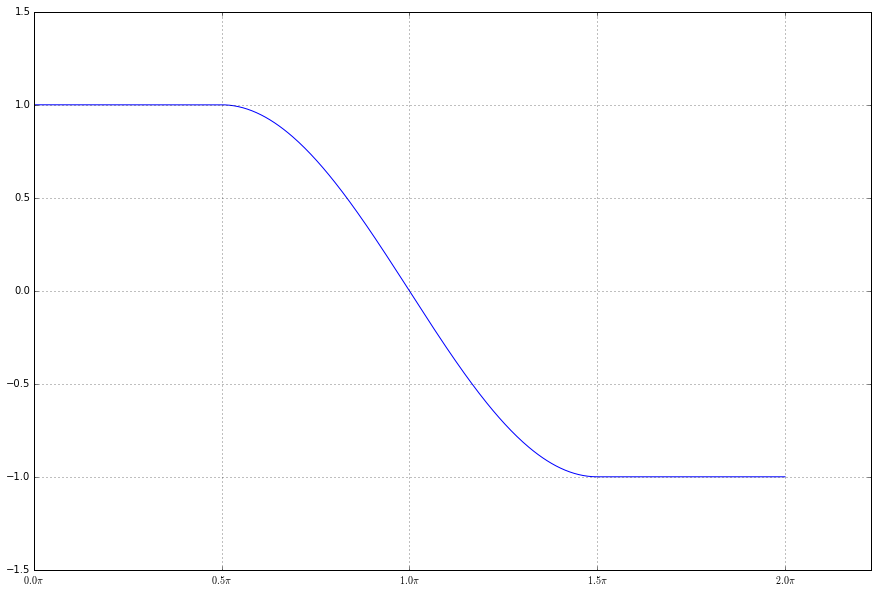

In [6]:
# Making sure our signal function is correct. 
fig, ax = plt.subplots(figsize=(15, 10))
x0 = np.linspace(0, 2*np.pi, 500)
u0 = signal(x0)
ax.plot(x0, u0)
ax.set_ylim(-1.5, 1.5)
plot_opts(ax, max(x0))
plt.show()

In [7]:
# Helper functions
def flux(u):
    return 0.5*u**2
def max_speed(u):
    return np.max(np.abs(u))
def calc_dt(u, cfl, dx):
    """Calculate delta t from CFL."""
    return cfl*dx/max_speed(u)

In [52]:
# Constant
DX = 0.1
GRID_LENGTH = np.pi*2
MU = 0.01

In [53]:
def solve(cfl, dx, tf, scheme):
    # 2 ghost cells on each side
    ghost = 2
    x = np.arange(0 - ghost*dx, GRID_LENGTH + dx + ghost*dx, dx)
    start = ghost
    end = len(x) - ghost
    u = signal(x)
    cnt = 0
    t = 0
    while t < tf:
        dt = min(calc_dt(u, cfl, dx), tf - t)
        t += dt
        u = scheme(u, dt, dx)
        cnt += 1
        if cnt >= 1000:
            print("max number of iterations reached.")
            print("t = %.2f" % t)
            break
    else: # Print the last time step
        print("Last time step: %.3f" % dt)
        lastcfl = max_speed(u)*dt/dx
        print("Last CFL: %.2f" % lastcfl)
        print("Number of iterations: %i" % cnt)
    
    return x, u

In [54]:
def mccormack(u, dt, dx):
    l = len(u)
    r = MU*dt/(dx**2)
    # Predictor
    ubar = u.copy()
    for j in range(1, l - 1):
        df = flux(u[j+1]) - flux(u[j])
        rterm = u[j+1] - 2*u[j] + u[j-1]
        ubar[j] = u[j] - (dt/dx)*df + r*rterm
    # Corrector
    u2 = u.copy()
    for j in range(2, l - 2):
        df = flux(ubar[j]) - flux(ubar[j-1])
        rterm = ubar[j+1] - 2*ubar[j] + ubar[j-1]
        u2[j] = 0.5*(u[j] + ubar[j+1] - (dt/dx)*df + r*rterm)
    print(dt <= dx**2/(max_speed(u)*dx + 2*MU))
    return u2

In [58]:
def roe(u, dt, dx):
    l = len(u)
    r = MU*dt/(dx**2)
    un = u.copy()
    for j in range(1, l - 1):
        rterm = u[j+1] - 2*u[j] + u[j-1]
        un[j] = u[j] - 0.25*(dt/dx)*(
            u[j+1]**2 - u[j-1]**2
            - np.abs(u[j] + u[j+1])*(u[j+1] - u[j])
            + np.abs(u[j] + u[j-1])*(u[j] - u[j-1])
        ) + r*rterm
    return un

In [59]:
cfl = 0.5
dx = 0.1
tf = 2
# x, u_lw = solve(cfl, dx, tf, lw)
x, u_mc = solve(cfl, dx, tf, mccormack)
_, u_r = solve(cfl, dx, tf, roe)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
Last time step: 0.029
Last CFL: 0.32
Number of iterations: 44
Last time step: 0.050
Last CFL: 0.50
Number of iterations: 40


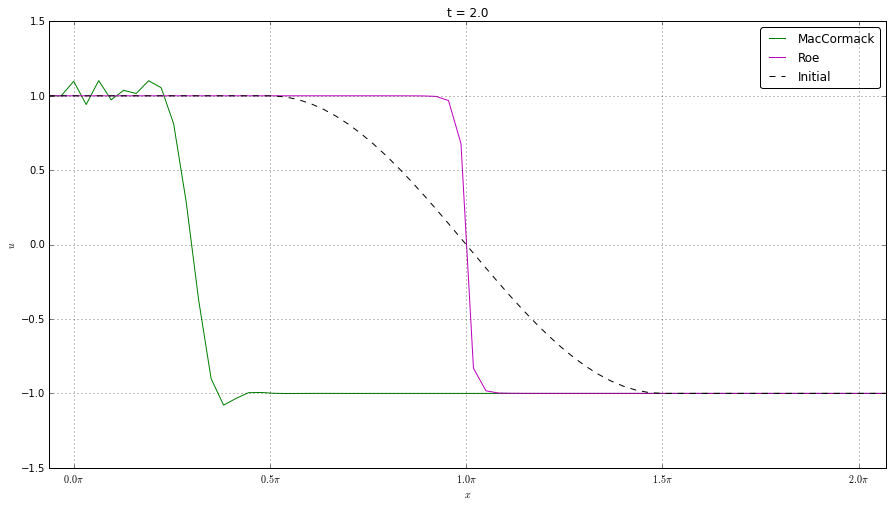

In [60]:
fig, ax = plt.subplots(figsize=(15, 8))
# ax.plot(x, u_lw, 'b.', label='Lax-Wendroff')
ax.plot(x, u_mc, 'g', label='MacCormack')
ax.plot(x, u_r, 'm', label='Roe')
ax.set_ylim(-1.5, 1.5)
plot_opts(ax, max(x0))
ax.plot(x, signal(x), 'k--', label='Initial')
ax.set_title('t = %.1f' % tf)
ax.legend(fancybox=True, loc='best')
ax.set_xlabel('$x$')
ax.set_ylabel('$u$')
plt.show()
fig.savefig('burgers_inviscid.pdf')